In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
#Euclidean Distance
def euclidean_distance(row1,row2):
    return distance.euclidean(row1,row2)

In [4]:
d1=[1,2]
d2=[5,6]
print(euclidean_distance(d1,d2))

5.656854249492381


In [5]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    #for train_row in train:
    for i in range(len(train.index)):
        lab = train.iloc[i][-1]
        dist = euclidean_distance(test_row, train.iloc[i][0:len(X_train.columns)-1])
        distances.append((lab, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [6]:
def knn(test_row, train, num_neighbors=3):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    #output_values = [row[-1] for row in neighbors]
    #prediction = max(set(output_values), key=output_values.count)
    prediction = max(set(neighbors), key=neighbors.count)
    return int(prediction)

In [7]:
def knn_all(test, train, num_neighbors=3):
    predictions = list()
    #for row in test:
    for i in range(len(test.index)):
        #print(i)
        output = knn(test.iloc[i], train, num_neighbors)
        predictions.append(output)
    return(predictions)

In [8]:
#Generating Random 2-D data

In [9]:
n = 100 #data points

X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
X2 = np.random.normal(loc=0, scale=1.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)


Y1 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2)) 
Y2 = np.random.normal(loc=0, scale=1.0, size=int(n/2))
Y = np.concatenate((Y1, Y2), axis=0)

In [10]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()

,X,Y
0,-1.006572,-0.830741
1,-2.276529,1.158709
2,-0.704623,1.314571
3,1.046060,0.395445
4,-2.468307,1.677429


In [12]:
dt.shape

(100, 2)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

In [14]:
X_train.head()

,X,Y
43,-2.602207,2.369268
62,-1.106335,1.158596
3,1.046060,0.395445
71,1.538037,-0.815810
45,-3.439688,3.563646


In [15]:
Y_train

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0]

In [16]:
X_test.head()

,X,Y
26,-4.301987,0.018927
86,0.915402,0.473238
2,-0.704623,1.314571
55,0.931280,-0.714351
75,0.821903,0.827183


In [17]:
Y_test

[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [18]:
X_train['label'] = Y_train
X_train.head()

C:\Users\Checkout\AppData\Local\Temp/ipykernel_35236/181096685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['label'] = Y_train


,X,Y,label
43,-2.602207,2.369268,0
62,-1.106335,1.158596,1
3,1.046060,0.395445,0
71,1.538037,-0.815810,1
45,-3.439688,3.563646,0


In [19]:
predictions = knn_all(X_test, X_train, num_neighbors=3)
print(predictions)

[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [20]:
def accuracy_metric(predictions, Y_test):
    correct = 0.0
    for i in range(len(predictions)):
            if predictions[i] == Y_test[i]:
               correct += 1
    return (correct / len(Y_test))

In [21]:
Result = accuracy_metric(Y_test, predictions)
print("Accuracy of the predictions on the test dataset is " + str(Result))

Accuracy of the predictions on the test dataset is 0.9


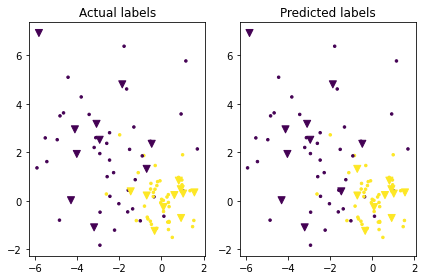

In [22]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=predictions, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

In [23]:
#Generating 3-D Data

In [24]:
n = 1000 #data points

X1 = np.random.normal(loc=0, scale=3.0, size=int(n/4))
X2 = np.random.normal(loc=-3, scale=1.0, size=int(n/4))
X3 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4)) 
X4 = np.random.normal(loc=0, scale=3.0, size=int(n/4))
X = np.concatenate((X1, X2, X3, X4), axis=0)

Y1 = np.random.normal(loc=0, scale=3.0, size=int(n/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Y3 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))
Y4 = np.random.normal(loc=5, scale=3.0, size=int(n/4))
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)

Z1 = np.random.normal(loc=0, scale=3.0, size=int(n/4))
Z2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))
Z4 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)

In [25]:
l1 = [0]*int(n/4)
l2 = [1]*int(n/4)
l3 = [2]*int(n/4)
l4 = [3]*int(n/4)
labels = l1+l2+l3+l4
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [26]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z}, columns=['X', 'Y', 'Z'])
dt.head()

,X,Y,Z
0,1.073362,0.375674,5.413044
1,1.682354,-1.288217,-0.572711
2,3.249154,0.366893,2.159274
3,3.161406,1.629894,-3.879819
4,-4.133008,0.146580,-2.869309


In [27]:
dt.shape

(1000, 3)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

In [29]:
X_train.head()

,X,Y,Z
687,-1.359292,1.424061,5.388338
500,-1.522723,1.350630,4.386809
332,-3.066080,1.646335,3.555513
979,-3.310768,5.020400,-2.484372
817,-1.451658,-1.011587,-5.832156


In [30]:
Y_train

[2,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 0,
 2,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 3,
 0,
 0,
 2,
 0,
 3,
 0,
 2,
 1,
 0,
 1,
 3,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 3,
 0,
 3,
 2,
 1,
 3,
 0,
 3,
 2,
 1,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 1,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 2,
 0,
 2,
 3,
 2,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 1,
 0,
 0,
 2,
 1,
 3,
 3,
 2,
 0,
 3,
 0,
 1,
 0,
 2,
 1,
 3,
 3,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 2,
 3,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 3,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 2,
 0,
 1,
 0,
 3,
 2,
 2,
 0,
 3,
 1,
 0,
 2,
 2,
 0,
 1,
 2,


In [31]:
X_test.head()

,X,Y,Z
993,0.959346,0.910478,-3.617642
859,-1.111843,5.580770,-3.395681
298,-3.875618,3.048125,3.790372
553,0.053642,-0.830633,3.849162
672,-2.379319,0.691966,1.912973


In [32]:
Y_test

[3,
 3,
 1,
 2,
 2,
 3,
 0,
 0,
 1,
 2,
 1,
 2,
 3,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 3,
 2,
 2,
 1,
 3,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 2,
 0,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 1,
 2,
 2,
 3,
 3,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 0,
 3,
 0,
 3,
 1,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 2,
 3,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 0,
 3,
 1,
 3,
 0,
 2,
 3,
 0,
 3,
 3,
 1,
 1,
 3,
 3,
 2,
 1,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 2,
 2,
 0,
 2,
 0]

In [33]:
X_train['label'] = Y_train
X_train.head()

C:\Users\Checkout\AppData\Local\Temp/ipykernel_35236/181096685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['label'] = Y_train


,X,Y,Z,label
687,-1.359292,1.424061,5.388338,2
500,-1.522723,1.350630,4.386809,2
332,-3.066080,1.646335,3.555513,1
979,-3.310768,5.020400,-2.484372,3
817,-1.451658,-1.011587,-5.832156,3


In [34]:
predictions = knn_all(X_test, X_train, num_neighbors=3)
print(predictions)

[0, 3, 1, 2, 1, 3, 0, 3, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1, 0, 0, 0, 1, 1, 2, 0, 3, 0, 0, 3, 0, 0, 2, 2, 3, 1, 2, 3, 1, 0, 2, 1, 3, 2, 2, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1, 3, 2, 2, 1, 2, 0, 1, 2, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 3, 0, 0, 0, 1, 3, 1, 1, 0, 2, 1, 1, 2, 2, 3, 2, 1, 0, 2, 3, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 2, 0, 2, 3, 3, 1, 1, 3, 1, 2, 3, 3, 0, 3, 1, 3, 2, 2, 3, 0, 3, 3, 0, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 1, 3, 2, 2, 1, 2, 0]


In [35]:
Result = accuracy_metric(Y_test, predictions)
print("Accuracy of the predictions on the test dataset is " + str(Result))

Accuracy of the predictions on the test dataset is 0.81
